In [1]:
import zipfile
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
# Define the root directory
ROOT_DIR = '/content/drive/My Drive/'

In [3]:
# !pip install kaggle

In [3]:
# from google.colab import files
# files.upload()  # Upload the kaggle.json file

# # Move the uploaded file to the required location
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [5]:
!kaggle datasets download -d mlg-ulb/creditcardfraud -p /content/drive/MyDrive/DM_Dataset

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 85% 56.0M/66.0M [00:00<00:00, 133MB/s]
100% 66.0M/66.0M [00:00<00:00, 136MB/s]


In [6]:
# import zipfile
# import os

# # Path to the downloaded zip file
# zip_file_path = "/content/drive/MyDrive/DM_Dataset/creditcardfraud.zip"

# # Directory where you want to extract the files
# extract_dir = "/content/drive/MyDrive/DM_Dataset/"

# # Unzip the file
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_dir)

# # List the files in the extraction directory to verify
# os.listdir(extract_dir)

['creditcardfraud.zip', 'creditcard.csv']

In [1]:
import pandas as pd
# path = '/content/drive/MyDrive/DM_Dataset/creditcard.csv'
creditCardcsv ='creditcard.csv'
df = pd.read_csv(creditCardcsv)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**DBSCAN**

In [2]:
# df6 = df.copy()
# df6 = df6.drop(['Class'], axis=1)

# from sklearn.cluster import DBSCAN
# from sklearn.preprocessing import StandardScaler

# # scale data first
# X = StandardScaler().fit_transform(df6.values)

# db = DBSCAN(eps=3.0, min_samples=10).fit(X)
# labels = db.labels_

# n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# print('The number of clusters in dataset is:', n_clusters_)

The number of clusters in dataset is: 43


In [5]:
# Assuming 'df' is your DataFrame
unique_labels = df['Class'].unique()
print("Unique labels in 'Class' column:", unique_labels)

# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Unique labels in 'Class' column: [0 1]
No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [52]:
# from sklearn.ensemble import IsolationForest

# df5 = df.copy()
# df5 = df5.drop(['Class'], axis=1)

# model=IsolationForest(n_estimators=150, max_samples='auto', contamination=float(0.1), max_features=1.0)
# model.fit(df5)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1, n_estimators=150)

In [53]:
# scores=model.decision_function(df5)
# anomaly=model.predict(df5)

# df5['scores']=scores
# df5['anomaly']=anomaly

# df5.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,scores,anomaly
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.066946,1
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.076897,1
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,-0.010553,-1
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.049110,1
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.060621,1
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.080356,1
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.069387,1
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,-0.022669,-1
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0.044552,1
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0.074205,1


In [54]:
# anomaly = df5.loc[df5['anomaly']==-1]
# anomaly_index = list(anomaly.index)
# print('Total number of outliers is:', len(anomaly))

Total number of outliers is: 28481


**Classification**

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
import pandas as pd
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve, auc

def show_predictions(model, test_series, label_series):

    predictions = model.predict(test_series)

    cm = confusion_matrix(label_series, predictions)
    print(classification_report(label_series, predictions))

    # Calculate AUC score
    auc_score = roc_auc_score(label_series, predictions)
    print(f"AUC Score: {auc_score}")

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(label_series, predictions)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    # Display confusion matrix
    disp = ConfusionMatrixDisplay(cm)
    disp.plot()
    plt.show()


In [6]:
df.Class.replace({1:-1}, inplace = True)
df.Class.replace({0:1}, inplace = True)

In [7]:
train = df.sample(frac=0.8,random_state=200)
test = df.drop(train.index)

col_names = ['Time', 'Amount']
scaler = StandardScaler().fit(train[col_names].values)
scaler.transform(train[col_names].values)
train[col_names] = scaler.transform(train[col_names].values)
test[col_names] = scaler.transform(test[col_names].values)

X_train = train.drop(columns=['Class'])
y_train = train['Class']

X_test = test.drop(columns=['Class'])
y_test = test['Class']


**One Class SVM**

Fit Time: 1673.0574431419373 seconds
              precision    recall  f1-score   support

          -1       0.02      0.90      0.03        98
           1       1.00      0.90      0.95     56863

    accuracy                           0.90     56961
   macro avg       0.51      0.90      0.49     56961
weighted avg       1.00      0.90      0.95     56961

AUC Score: 0.8991932632926902


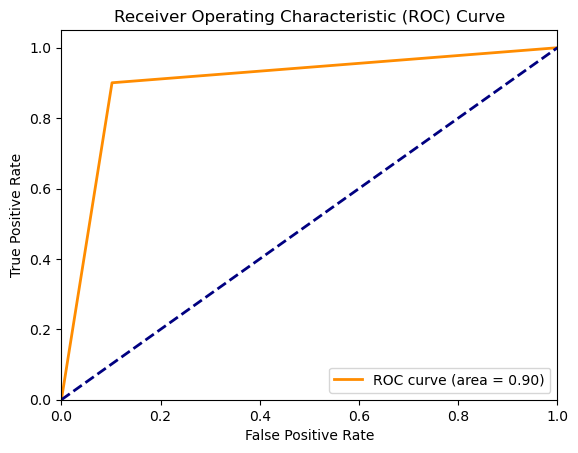

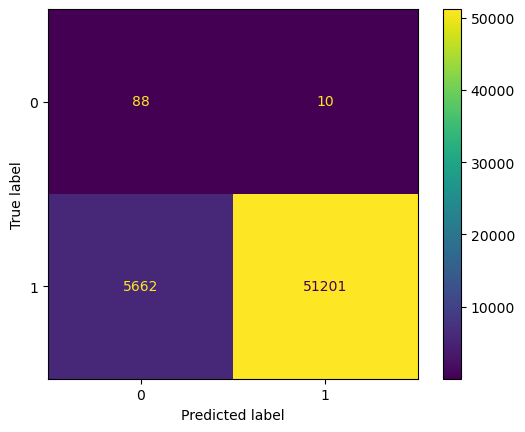

Prediction Time: 157.8012638092041 seconds


In [16]:
from sklearn.svm import OneClassSVM

# Initialize the One-Class SVM model
clf = OneClassSVM(gamma='auto', nu=0.1)

# Fit the model and measure the time taken
start_time = time.time()
clf.fit(X_train)
fit_time = time.time() - start_time
print(f"Fit Time: {fit_time} seconds")

# Show the predictions and measure the time taken
start_time = time.time()
show_predictions(clf, X_test, y_test)
predict_time = time.time() - start_time
print(f"Prediction Time: {predict_time} seconds")

**Isolation Forest**

Fit Time: 1.1094470024108887 seconds
              precision    recall  f1-score   support

          -1       0.04      0.85      0.08        98
           1       1.00      0.97      0.98     56863

    accuracy                           0.97     56961
   macro avg       0.52      0.91      0.53     56961
weighted avg       1.00      0.97      0.98     56961

AUC Score: 0.9067098077118401


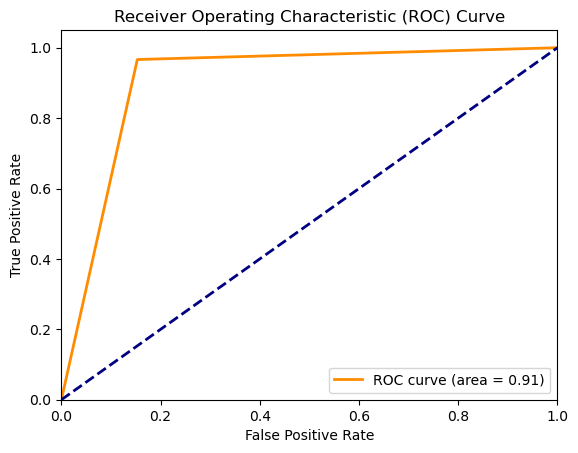

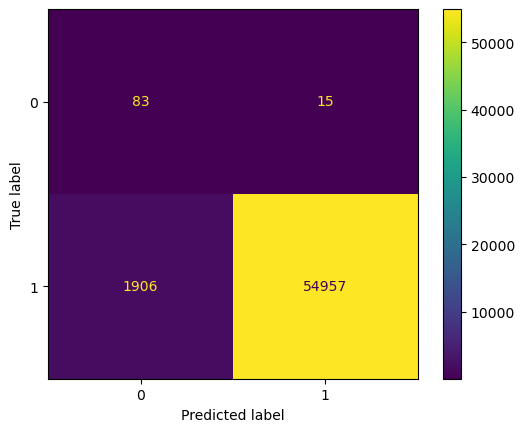

Prediction Time: 2.6767213344573975 seconds


In [10]:
from sklearn.ensemble import IsolationForest
import time
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Initialize the Isolation Forest model
isol = IsolationForest(random_state=200)

# Fit the model and measure the time taken
start_time = time.time()
isol.fit(X_train)
fit_time = time.time() - start_time
print(f"Fit Time: {fit_time} seconds")

# Show the predictions and measure the time taken
start_time = time.time()
show_predictions(isol, X_test, y_test)
predict_time = time.time() - start_time
print(f"Prediction Time: {predict_time} seconds")


**Local Outlier Factor**

Fit Time: 19.209816694259644 seconds
              precision    recall  f1-score   support

          -1       0.00      0.10      0.00        98
           1       1.00      0.92      0.96     56863

    accuracy                           0.92     56961
   macro avg       0.50      0.51      0.48     56961
weighted avg       1.00      0.92      0.96     56961

AUC Score: 0.5124716154509568


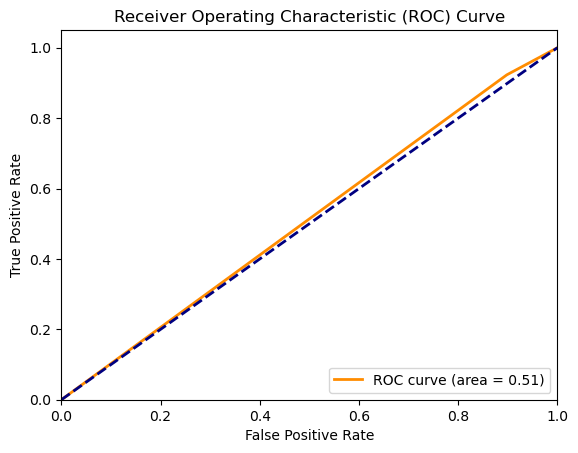

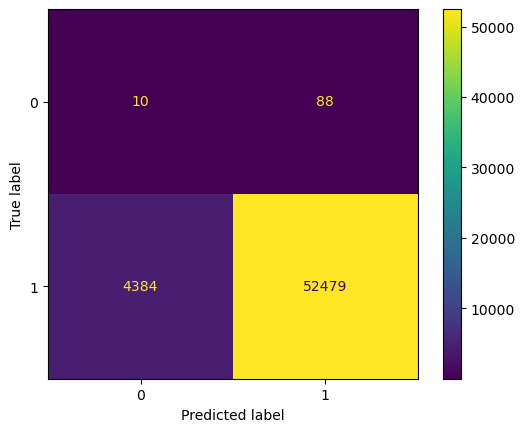

Prediction Time: 5.400302886962891 seconds


In [12]:
from sklearn.neighbors import LocalOutlierFactor

# Initialize the LOF model
lof = LocalOutlierFactor(n_neighbors=4, novelty=True)

# Fit the model and measure the time taken
start_time = time.time()
lof.fit(X_train)
fit_time = time.time() - start_time
print(f"Fit Time: {fit_time} seconds")

# Show the predictions and measure the time taken
start_time = time.time()
show_predictions(lof, X_test, y_test)
predict_time = time.time() - start_time
print(f"Prediction Time: {predict_time} seconds")

**PCA**

In [13]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Perform PCA
pca = PCA(n_components=2)
start_time = time.time()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
pca_time = time.time() - start_time
print(f"PCA Time: {pca_time} seconds")

PCA Time: 0.5279521942138672 seconds


**DBSCAN**

In [14]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

df6 = df.copy()
df6 = df6.drop(['Class'], axis=1)

# scale data first
X = StandardScaler().fit_transform(df6.values)

# Initialize DBSCAN
db = DBSCAN(eps=3.0, min_samples=10)

# Fit the model and measure the time taken
start_time = time.time()
labels = db.fit_predict(X)
fit_time = time.time() - start_time
print(f"DBSCAN Fit Time: {fit_time} seconds")

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('The number of clusters in dataset is:', n_clusters_)

DBSCAN Fit Time: 574.0234062671661 seconds
The number of clusters in dataset is: 43


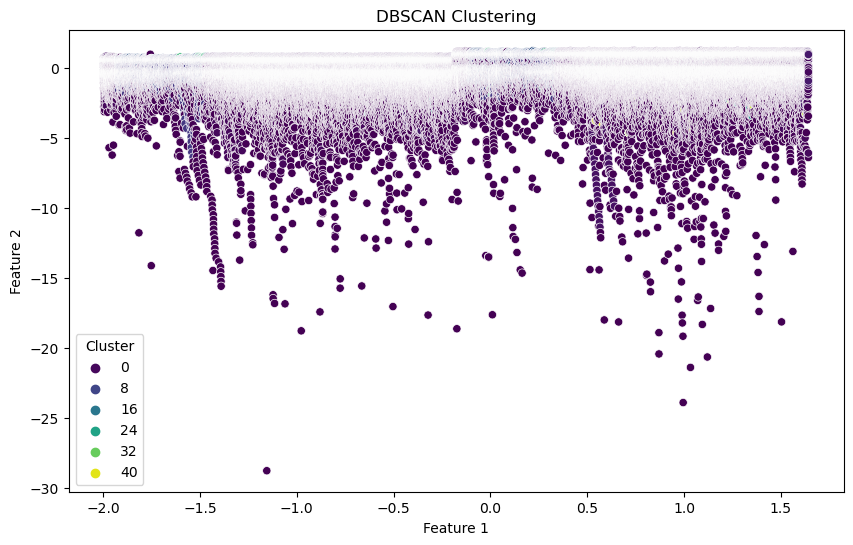

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.show()

**Anomaly Transformer**

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense_12 (Dense)            (None, 15)                465       
                                                                 
 dropout (Dropout)           (None, 15)                0         
                                                                 
 dense_13 (Dense)            (None, 8)                 128       
                                                                 
 dense_14 (Dense)            (None, 4)                 36        
                                                                 
 dense_15 (Dense)            (None, 8)                 40        
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          -1       1.00      0.25      0.40     56961
           1       0.00      0.00      0.00         0

    accuracy                           0.25     56961
   macro avg       0.50      0.13      0.20     56961
weighted avg       1.00      0.25      0.40     56961



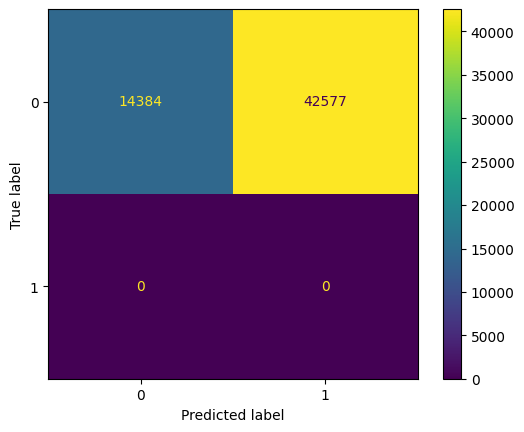

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import tensorflow as tf
from tensorflow.keras import layers, regularizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def show_predictions(model, test_series, label_series):

    predictions = model.predict(test_series)

    cm = confusion_matrix(label_series, predictions)
    print(classification_report(label_series, predictions))

    disp = ConfusionMatrixDisplay(cm)
    disp.plot()
    plt.show()

df.Class.replace({1:-1}, inplace = True)
df.Class.replace({0:1}, inplace = True)

train = df.sample(frac=0.8,random_state=200)
test = df.drop(train.index)

col_names = ['Time', 'Amount']
scaler = StandardScaler().fit(train[col_names].values)
scaler.transform(train[col_names].values)
train[col_names] = scaler.transform(train[col_names].values)
test[col_names] = scaler.transform(test[col_names].values)

X_train = train.drop(columns=['Class'])
y_train = train['Class']

X_test = test.drop(columns=['Class'])
y_test = test['Class']

# Define the autoencoder model
input_layer = layers.Input(shape=(X_train.shape[1],))
encoder = layers.Dense(15, activation="tanh", activity_regularizer=regularizers.l2(0.0001))(input_layer)
encoder = layers.Dropout(0.2)(encoder)
encoder = layers.Dense(8, activation='relu')(encoder)
encoder = layers.Dense(4, activation=tf.nn.leaky_relu)(encoder)
decoder = layers.Dense(8, activation='relu')(encoder)
decoder = layers.Dropout(0.2)(decoder)
decoder = layers.Dense(15, activation='relu')(decoder)
decoder = layers.Dense(X_train.shape[1], activation='tanh')(decoder)

autoencoder = tf.keras.Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Fit the autoencoder model to the training data
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, verbose=1)

# Create a custom transformer class that applies the autoencoder model
class AutoencoderTransformer:

    def __init__(self, model):
        self.model = model

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return self.model.predict(X)

# Initialize the transformer with the trained autoencoder model
transformer = AutoencoderTransformer(autoencoder)

# Apply the transformer to the test data
X_test_transformed = transformer.transform(X_test)

# Initialize the Isolation Forest model
from sklearn.ensemble import IsolationForest
isol = IsolationForest(random_state=200)

# Fit the model to the transformed test data
isol.fit(X_test_transformed)

# Show the predictions
show_predictions(isol, X_test_transformed, y_test)

In [27]:
import numpy as np
import pandas as pd
import dtw
from tslearn.metrics import dtw_path

def dtw_anomaly_detection(x_train, window_size=10, threshold_multiplier=2):
    distances = []
    for i in range(len(x_train) - window_size):
        window = x_train[i:i+window_size]
        for j in range(i+1, len(x_train) - window_size):
            window2 = x_train[j:j+window_size]
            distance, _ = dtw_path(window, window2)
            distances.append(distance)
    threshold = np.mean(distances) + threshold_multiplier * np.std(distances)
    anomalies = [i for i, distance in enumerate(distances) if distance > threshold]
    return anomalies

# Example usage
anomalies = dtw_anomaly_detection(X_train, window_size=10, threshold_multiplier=2)
print(anomalies)